In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_listings = pd.read_csv('./listings.csv')
np.shape(df_listings)

(3818, 92)

In [2]:
neighborhood_price = df_listings[['neighbourhood_group_cleansed','price']]
neighborhood_price.head()


,neighbourhood_group_cleansed,price
0,Queen Anne,$85.00
1,Queen Anne,$150.00
2,Queen Anne,$975.00
3,Queen Anne,$100.00
4,Queen Anne,$450.00


In [3]:
def clean_price_field(df, fieldname):
    '''
    INPUT:
    df - pandas dataframe containing price column
    fieldname - price column name in dataframe which should be cleaned up to get a float value for analysis
    
    OUTPUT:
    df - same dataframe that has price column without '$' or ','. Price column will be a float object
    '''
    df[fieldname] = [x.strip('$') for x in df[fieldname]]
    df[fieldname] = [x.replace(',','') for x in df[fieldname]]
    df[fieldname] = df[fieldname].astype(float)
    return df[fieldname]

In [4]:
neighborhood_price['price'] = clean_price_field(neighborhood_price, 'price')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: Se

In [5]:
neighborhood_price.head()

,neighbourhood_group_cleansed,price
0,Queen Anne,85.0
1,Queen Anne,150.0
2,Queen Anne,975.0
3,Queen Anne,100.0
4,Queen Anne,450.0


In [6]:
neighborhood_mean_price = neighborhood_price.groupby('neighbourhood_group_cleansed', as_index=False)['price'].mean().sort_values(by=['price'],
                                                                                                ascending=False)
neighborhood_mean_price = neighborhood_mean_price.reset_index(drop=True)

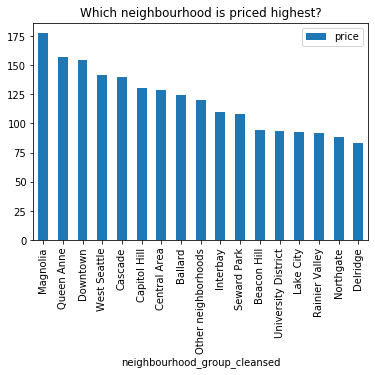

In [7]:
neighborhood_mean_price.plot(kind='bar',x='neighbourhood_group_cleansed',y='price')
plt.title("Which neighbourhood is priced highest?");

### Most priced airbnb need not generate maximum revenue so will look at the calendar dataset to understand more about the revenue. 

# Season vs price vs Revenue

In [8]:
df_cal = pd.read_csv('./calendar.csv')
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [9]:
#Sort the list and drop na
df_cal_no_na = df_cal.sort_values(by=["listing_id","date"]).dropna()
df_cal_no_na.head()

,listing_id,date,available,price
797216,3335,2016-02-29,t,$120.00
797217,3335,2016-03-01,t,$120.00
797218,3335,2016-03-02,t,$120.00
797219,3335,2016-03-03,t,$120.00
797220,3335,2016-03-04,t,$120.00


In [10]:
df_cal_no_na['price'] = clean_price_field(df_cal_no_na, "price")
df_cal_no_na.head()

,listing_id,date,available,price
797216,3335,2016-02-29,t,120.0
797217,3335,2016-03-01,t,120.0
797218,3335,2016-03-02,t,120.0
797219,3335,2016-03-03,t,120.0
797220,3335,2016-03-04,t,120.0


In [11]:
def get_seasonal_price(df):
    '''
    INPUT:
    df - pandas dataframe for calendar with columns listing_id, date and price
    
    
    OUTPUT:
    df - new dataframe that has following features:
        1. columns in the new dataframe include listing_id, season, price
        2. season is calculated based on the dates - Dec to Feb = Winter, Mar to May = Spring, 
                                                        Jun to Aug = Summer, Sep to Nov = Fall
        3. Seasonal price is calculated by taking mean of the price in a particular season for a listing id
    '''
    prev_listing_id = 0
    winter_sum = spring_sum= summer_sum= fall_sum= winter_count= spring_count= summer_count= fall_count = 0 
    calendar_data = []
    for index, row in df.iterrows():
        if prev_listing_id != row['listing_id'] and prev_listing_id != 0:
            calendar_data.append([prev_listing_id, 'winter', winter_sum/winter_count if winter_count else 0])
            calendar_data.append([prev_listing_id, 'spring', spring_sum/spring_count if spring_count else 0])
            calendar_data.append([prev_listing_id, 'summer', summer_sum/summer_count if summer_count else 0])
            calendar_data.append([prev_listing_id, 'fall', fall_sum/fall_count if fall_count else 0])
            winter_sum = spring_sum= summer_sum= fall_sum= winter_count= spring_count= summer_count= fall_count = 0 
        if row['date'] >="2016-01-01" and row['date'] <="2016-02-29":
            winter_sum += row['price']
            winter_count +=1
        if row['date'] >="2016-03-01" and row['date'] <="2016-05-31":
            spring_sum += row['price']
            spring_count += 1
        if row['date'] >="2016-06-01" and row['date'] <="2016-08-31":
            summer_sum += row['price']
            summer_count += 1
        if row['date'] >="2016-09-01" and row['date'] <="2016-11-30":
            fall_sum += row['price']
            fall_count += 1
        if row['date'] >="2016-12-01" and row['date'] <="2016-12-31":
            winter_sum += row['price']
            winter_count += 1
        prev_listing_id = row['listing_id']
    calendar_data.append([prev_listing_id, 'winter', winter_sum/winter_count if winter_count else 0])
    calendar_data.append([prev_listing_id, 'spring', spring_sum/spring_count if spring_count else 0])
    calendar_data.append([prev_listing_id, 'summer', summer_sum/summer_count if summer_count else 0])
    calendar_data.append([prev_listing_id, 'fall', fall_sum/fall_count if fall_count else 0])
    df_new_calendar = pd.DataFrame(calendar_data,columns=['listing_id','season', 'price'])
    return df_new_calendar
            

In [13]:
df_new_calendar = get_seasonal_price(df_cal_no_na)
df_new_calendar.head(15)

,listing_id,season,price
0,3335,winter,120.000000
1,3335,spring,120.000000
2,3335,summer,120.000000
3,3335,fall,120.000000
4,4291,winter,82.000000
5,4291,spring,82.000000
6,4291,summer,82.000000
7,4291,fall,82.000000
8,5682,winter,50.328125
9,5682,spring,54.491803


In [14]:
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [ ]:
#Adding season column based on the date
for idx, row in df_cal.iterrows():
    if df_cal.loc[idx,'date'] >="2016-01-01" and df_cal.loc[idx,'date'] <="2016-02-29":
        df_cal.loc[idx,'season'] = 'winter'
    elif df_cal.loc[idx,'date'] >="2016-03-01" and df_cal.loc[idx,'date'] <="2016-05-31":
        df_cal.loc[idx,'season'] = 'spring'
    elif df_cal.loc[idx,'date'] >="2016-06-01" and df_cal.loc[idx,'date'] <="2016-08-31":
        df_cal.loc[idx,'season'] = 'summer'
    elif df_cal.loc[idx,'date'] >="2016-09-01" and df_cal.loc[idx,'date'] <="2016-11-30":
        df_cal.loc[idx,'season'] = 'fall'
    elif df_cal.loc[idx,'date'] >="2016-12-01" and df_cal.loc[idx,'date'] <="2016-12-31":
        df_cal.loc[idx,'season'] = 'winter'
        
df_cal.head(10)

In [ ]:
df_merged = pd.merge(df_new_calendar, df_cal, on=["listing_id", 'season'])
df_merged.head()

In [ ]:
# For revenue, we will only consider listings with available = f This is an ASSUMPTION that listings that
# are not available are occupied.
df_merged_unavail = df_merged[df_merged.available =='f']
df_merged_unavail.head(s)

In [ ]:
df_merged_unavail_revenue_season = df_merged_unavail.groupby('season', as_index=False)['price_x'].sum().sort_values(by=['price_x'],
                                                                                                ascending=False)

In [ ]:
df_merged_unavail_revenue_season.plot(kind='bar',x='season',y='price_x', color='blue')
plt.title("Which season has more priced Airbnbs?")

In [ ]:
df_merged_unavail_revenue_season = df_merged_unavail.groupby('date', as_index=False)['price_x'].sum().sort_values(by=['price_x'],
                                                                                                ascending=False)
df_merged_unavail_revenue_season.plot(kind='line',x='date',y='price_x', color='blue')
plt.title("Which season earns more revenue?")

In [ ]:
# Which season is most occupied?
df_merged_unavail_season = df_merged_unavail.groupby('date', as_index=False)['listing_id'].count().sort_values(by=['listing_id'],
                                                                                                ascending=False)
df_merged_unavail_season.plot(kind='line',x='date',y='listing_id', color='blue')
plt.title("Which season is most occupied?")


In [ ]:
# Which season is most occupied?
df_merged_unavail_season = df_merged_unavail.groupby('season', as_index=False)['listing_id'].count().sort_values(by=['listing_id'],
                                                                                                ascending=False)
df_merged_unavail_season.plot(kind='bar',x='season',y='listing_id', color='blue')
plt.title("Which season is most occupied?")

In [ ]:
#Which season has most high average price? 
df_merged_unavail_season = df_merged_unavail.groupby('season', as_index=False)['price_x'].mean().sort_values(by=['price_x'],
                                                                                                ascending=False)
df_merged_unavail_season.plot(kind='bar',x='season',y='price_x', color='blue')
plt.title("Which season has the highest price?")


### CONCLUSION : Even though summers are most occupied, since airbnbs are priced highest during winters, the total revenue is also highest during Winters esepcially during New Years. 

# Neighborhood vs prices vs revenue

In [ ]:
#Neighborhood
df_neighborhood = df_listings[["id", 'neighbourhood_group_cleansed']]
df_neighborhood.head()

In [ ]:
df_neighborhood.rename(columns={'id':'listing_id'}, inplace=True) #changing the column name to merge on this column
df_merged_neighborhood = pd.merge(df_neighborhood, df_merged_unavail, on="listing_id")
df_merged_neighborhood.head()

In [ ]:
df_merged_revenue_neighbourhood = df_merged_neighborhood.groupby('neighbourhood_group_cleansed', 
                                                    as_index=False)['price_x'].sum().sort_values(by=['price_x'],
                                                                                                ascending=False)
df_merged_revenue_neighbourhood.plot(kind='bar',x='neighbourhood_group_cleansed',y='price_x', color='purple')
plt.title("Which neighbourhood earns more revenue?")

### CONCLUSION : If we remove "other neighbourhoods", the neighborhoods that generate maximum revenue is Downtown followed by Capitol Hill and Queen Anne. If we compare it with the first graph in this book, airbns in Downtown and Capitol Hill are marked reasonably higher as well as compared to other areas. However, Magnolia which is priced highest generates one of the lowest revenues.